In [ ]:
# Exploratory Data Analysis (EDA) is a crucial first step in any data analysis task.
# It involves examining and visualizing data to understand its key characteristics,
# uncover patterns, detect anomalies, and formulate hypotheses.

#libries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'dataset.csv' with your actual dataset file)
df = pd.read_csv('/content/Reinsuarance_data.csv')

# Display the first few rows to understand the structure
print(df.head())



  Company      Town  NO. OF POLICIES  ASSUARED AMOUNT  YEAR TYPE OF POLICY
0  BRITAM   Nairobi                5            34000  2014          MOTOR
1  BRITAM   Mombasa                5            24000  2014       DOMESTIC
2  BRITAM    Kisumu                5            20000  2014      EDUCATION
3  BRITAM   Eldoret                4            17000  2014    AGRICULTURE
4  BRITAM  Kakamega                5            17900  2014     WHOLE LIFE


In [ ]:
# Check the dimensions of the dataset(102-rows, 6-columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (102, 6)


In [ ]:
# Check column names, data types, and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          102 non-null    object
 1   Town             102 non-null    object
 2   NO. OF POLICIES  102 non-null    int64 
 3   ASSUARED AMOUNT  102 non-null    int64 
 4   YEAR             102 non-null    int64 
 5   TYPE OF POLICY   102 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.9+ KB
None


In [ ]:

# Summary statistics for numerical columns
print(df.describe())



       NO. OF POLICIES  ASSUARED AMOUNT         YEAR
count       102.000000       102.000000   102.000000
mean          5.058824     61065.656863  2015.000000
std           1.687599     35096.420305     0.820529
min           2.000000      2600.000000  2014.000000
25%           4.000000     35535.000000  2014.000000
50%           5.000000     58500.000000  2015.000000
75%           6.000000     78876.000000  2016.000000
max          10.000000    241000.000000  2016.000000


In [ ]:
# Check for missing values in this case we don't  have null values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Company            0
Town               0
NO. OF POLICIES    0
ASSUARED AMOUNT    0
YEAR               0
TYPE OF POLICY     0
dtype: int64


In [ ]:
year = df['YEAR']
print(year)

0      2014
1      2014
2      2014
3      2014
4      2014
       ... 
97     2016
98     2016
99     2016
100    2016
101    2016
Name: YEAR, Length: 102, dtype: int64


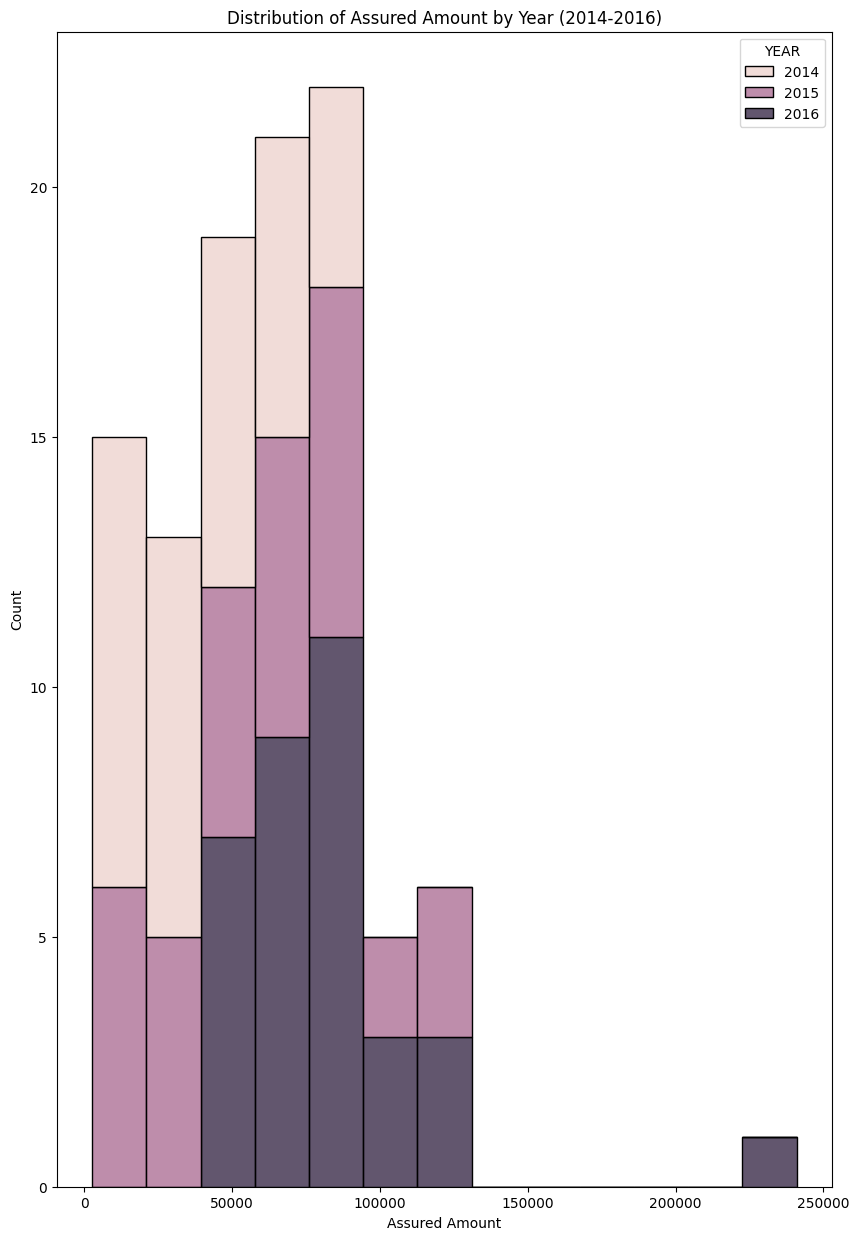

In [ ]:
# Histograms or density plots for numerical variables
years_of_interest = [2014, 2015, 2016]
filtered_df = df[df['YEAR'].isin(years_of_interest)]

# Plotting the histogram
plt.figure(figsize=(10, 15))
sns.histplot(filtered_df, x='ASSUARED AMOUNT', hue='YEAR', multiple='stack', edgecolor='black')
plt.title('Distribution of Assured Amount by Year (2014-2016)')
plt.xlabel('Assured Amount')
plt.ylabel('Count')
# plt.grid()


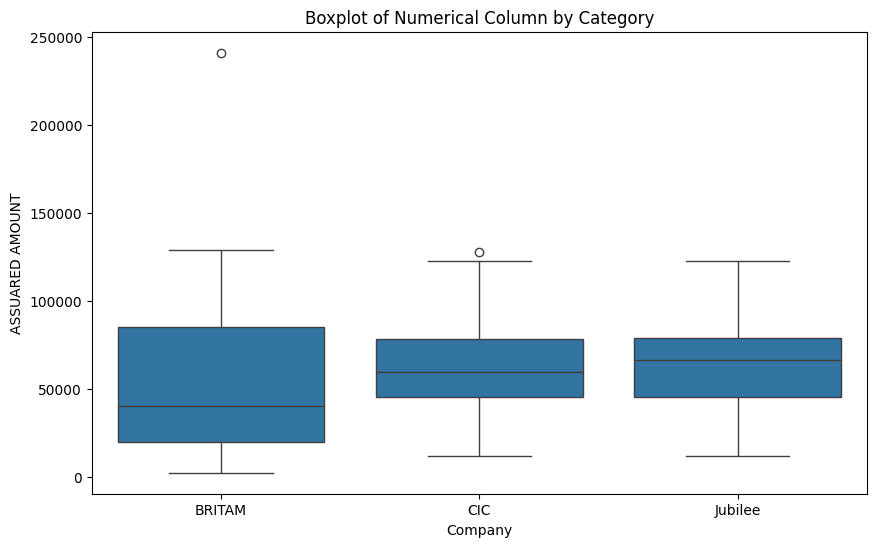

In [ ]:
# Boxplots or violin plots to identify outliers and distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='ASSUARED AMOUNT', data=df)
plt.title('Boxplot of Numerical Column by Category')
plt.xlabel('Company')
plt.ylabel('ASSUARED AMOUNT')
plt.show()

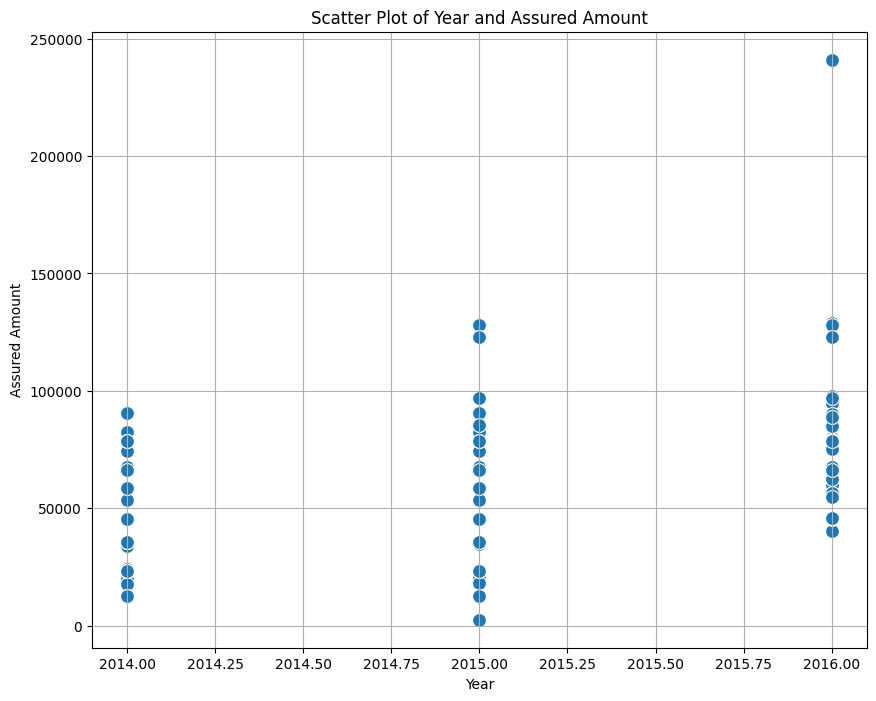

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='YEAR', y='ASSUARED AMOUNT', data=df, s=100)  # s controls the marker size
plt.title('Scatter Plot of Year and Assured Amount')
plt.xlabel('Year')
plt.ylabel('Assured Amount')
plt.grid(True)
plt.show()

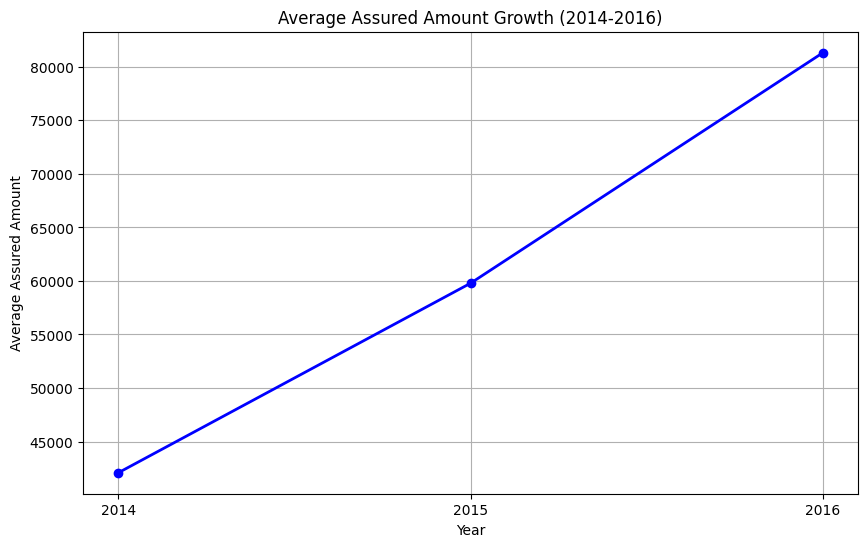

In [ ]:
# Aggregate data by year and calculate mean 'ASSUARED AMOUNT' for each year
yearly_mean = df.groupby('YEAR')['ASSUARED AMOUNT'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Average Assured Amount Growth (2014-2016)')
plt.xlabel('Year')
plt.ylabel('Average Assured Amount')
plt.grid(True)
plt.xticks(yearly_mean.index)  # Set x-axis ticks to match years
plt.show()